In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [17]:
df= pd.read_csv("StarClassificationDS.csv")
df.head()


<ipython-input-17-4373adac7b3a>:1: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("StarClassificationDS.csv")


,object_ID,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,red_shift,plate_ID,MJD,fiber_ID,class
0,1.240000e+18,135.6891066,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.540000e+18,0.634794,5812,56354,171,GALAXY
1,1.240000e+18,144.8261006,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.180000e+19,0.779136,10445,58158,427,GALAXY
2,1.240000e+18,142.1887896,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.150000e+18,0.644195,4576,55592,299,GALAXY
3,1.240000e+18,338.7410378,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030000e+19,0.932346,9149,58039,775,GALAXY
4,1.240000e+18,345.2825932,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,NaN,301,3,137,6.890000e+18,0.116123,6121,56187,842,GALAXY


In [18]:
df.columns

Index(['object_ID', 'alpha', 'delta', 'UV_filter', 'green_filter',
       'red_filter', 'near_IR_filter', 'IR_filter', 'run_ID', 'rerun_ID',
       'cam_col', 'field_ID', 'spec_obj_ID', 'red_shift', 'plate_ID', 'MJD',
       'fiber_ID', 'class'],
      dtype='object')

In [19]:
# Check dataset information
df.info()

# Check for missing values
print(df.isnull().sum())

# Check unique values in the target column
print(df['class'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   object_ID       100000 non-null  float64
 1   alpha           99999 non-null   object 
 2   delta           99998 non-null   float64
 3   UV_filter       100000 non-null  float64
 4   green_filter    100000 non-null  float64
 5   red_filter      100000 non-null  float64
 6   near_IR_filter  100000 non-null  float64
 7   IR_filter       100000 non-null  float64
 8   run_ID          99994 non-null   object 
 9   rerun_ID        100000 non-null  int64  
 10  cam_col         100000 non-null  int64  
 11  field_ID        100000 non-null  int64  
 12  spec_obj_ID     100000 non-null  float64
 13  red_shift       100000 non-null  float64
 14  plate_ID        100000 non-null  int64  
 15  MJD             100000 non-null  int64  
 16  fiber_ID        100000 non-null  int64  
 17  class      

In [20]:
# Drop non-informative columns
X = df.drop(columns=['class', 'object_ID', 'spec_obj_ID', 'plate_ID', 'fiber_ID'])

# Define the target variable
y = df['class']


In [21]:
# Check data types of all columns
print(X.dtypes)


alpha              object
delta             float64
UV_filter         float64
green_filter      float64
red_filter        float64
near_IR_filter    float64
IR_filter         float64
run_ID             object
rerun_ID            int64
cam_col             int64
field_ID            int64
red_shift         float64
MJD                 int64
dtype: object


In [22]:
# Identify columns that have mixed data types
for col in X.columns:
    unique_types = X[col].map(type).unique()
    print(f"Column '{col}' has data types: {unique_types}")


Column 'alpha' has data types: [<class 'str'> <class 'float'>]
Column 'delta' has data types: [<class 'float'>]
Column 'UV_filter' has data types: [<class 'float'>]
Column 'green_filter' has data types: [<class 'float'>]
Column 'red_filter' has data types: [<class 'float'>]
Column 'near_IR_filter' has data types: [<class 'float'>]
Column 'IR_filter' has data types: [<class 'float'>]
Column 'run_ID' has data types: [<class 'str'> <class 'float'> <class 'int'>]
Column 'rerun_ID' has data types: [<class 'int'>]
Column 'cam_col' has data types: [<class 'int'>]
Column 'field_ID' has data types: [<class 'int'>]
Column 'red_shift' has data types: [<class 'float'>]
Column 'MJD' has data types: [<class 'int'>]


In [23]:
# Convert numeric columns to proper dtype
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')  # Convert to float, replace errors with NaN

# Fill NaN values after conversion
X.fillna(X.mean(), inplace=True)


In [24]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns (if any)
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])


In [25]:
# Now, apply StandardScaler safely
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [26]:
# Perform stratified train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Verify class distribution in train and test sets
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))


class
GALAXY    0.594450
STAR      0.215938
QSO       0.189612
Name: proportion, dtype: float64
class
GALAXY    0.59445
STAR      0.21595
QSO       0.18960
Name: proportion, dtype: float64


In [27]:
# Initialize and train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)


In [28]:
# Generate classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     11889
         QSO       0.97      0.93      0.95      3792
        STAR       0.99      1.00      1.00      4319

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.98     20000
weighted avg       0.98      0.98      0.98     20000



If precision is low → Model predicts too many false positives.

If recall is low → Model misses actual positives.

If F1-score is low → Model needs improvement

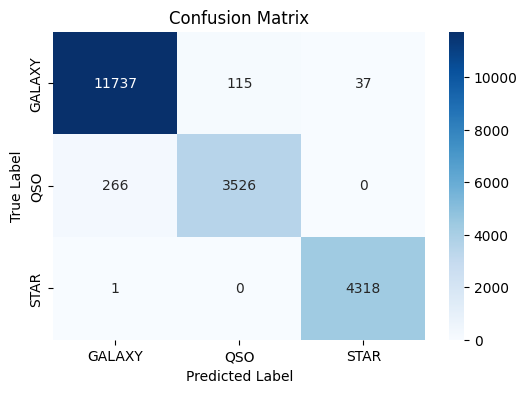

In [29]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Findings from the Classification Report

The model has achieved high accuracy (98%), which suggests it performs well on the given dataset. Below are the key observations:

Class-wise Performance:

GALAXY:
Precision: 0.98 (Very few false positives)
Recall: 0.99 (Almost all galaxies are correctly classified)
F1-score: 0.98 (Good balance between precision & recall)

QSO (Quasi-Stellar Objects):
Precision: 0.97 (Very few false positives)
Recall: 0.93 (Some QSOs are misclassified as other classes)
F1-score: 0.95 (Lower than GALAXY and STAR)

STAR:
Precision: 0.99 (Almost no false positives)
Recall: 1.00 (All stars are correctly classified)
F1-score: 1.00 (Perfect performance)

Class Imbalance Consideration:

The dataset is imbalanced with more galaxies (11,889) compared to QSOs (3,792) and stars (4,319).
This could explain why QSO has the lowest recall (0.93)—the model might struggle to correctly classify minority classes.

Macro vs. Weighted Averages:

Macro avg (Unweighted mean): 0.98 precision, 0.97 recall, 0.98 F1-score

Weighted avg (Considering class sizes): 0.98 precision, 0.98 recall, 0.98 F1-score

Since the macro and weighted scores are similar, the model does not heavily favor the majority class.

In [30]:
# Import necessary libraries
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
data = fetch_california_housing()
df1 = pd.DataFrame(data.data, columns=data.feature_names)
df1['Price'] = data.target  # Target variable

# Display dataset info
print(df1.info())
print(df1.describe())

# Calculate number of bins using Sturge's rule
num_bins = math.ceil(1 + np.log2(len(df1)))

# Create price bins for stratification
df1['Price_Bin'] = pd.qcut(df1['Price'], q=num_bins, labels=False)

# Perform Stratified Splitting
X = df1.drop(columns=['Price', 'Price_Bin'])
y = df1['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=df1['Price_Bin'], random_state=42
)

# Drop the Price_Bin column as it was only for stratification
df1.drop(columns=['Price_Bin'], inplace=True)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
ridge_preds = ridge_model.predict(X_test_scaled)

# Train Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
lasso_preds = lasso_model.predict(X_test_scaled)

# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    print(f"\n{model_name} Evaluation:")
    print(f"MAE  = {mae:.4f}")
    print(f"MSE  = {mse:.4f}")
    print(f"RMSE = {rmse:.4f}")

    return mae, mse, rmse

# Compare Ridge and Lasso
ridge_metrics = evaluate_model(y_test, ridge_preds, "Ridge Regression")
lasso_metrics = evaluate_model(y_test, lasso_preds, "Lasso Regression")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
2

Findings from Ridge vs. Lasso Regression :

Ridge Regression (Lower Errors )

MAE = 0.5405 (Lower, meaning better predictions)
MSE = 0.5397 (Lower, meaning fewer large errors)
RMSE = 0.7346 (Lower, meaning overall better fit)

Lasso Regression (Higher Errors )

MAE = 0.6254 (Higher, meaning less accurate predictions)
MSE = 0.6900 (Higher, meaning more large errors)
RMSE = 0.8307 (Higher, meaning worse overall fit)

Key Observations:

1. Ridge performed better than Lasso across all metrics, meaning it preserved useful features while preventing overfitting.

2. Lasso had higher errors, likely due to some features being shrunk to zero, losing valuable information.

3. If feature selection is important, Lasso is useful despite its higher error. But if we need better accuracy, Ridge is the better choice.